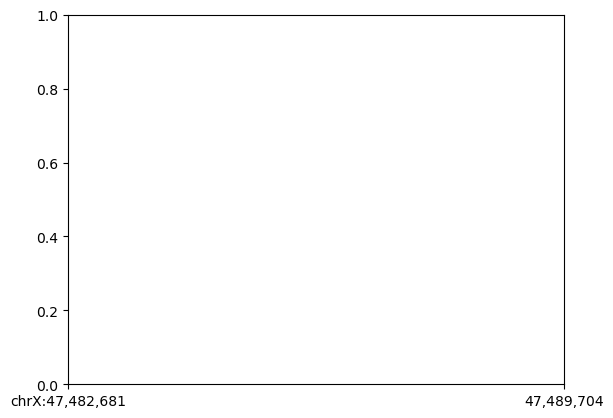

In [81]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np
x = np.array([0,1])
#y = np.array([20,21])
my_xticks = ['chrX:47,482,681', '47,489,704']
plt.xticks(x, my_xticks)
plt.show()



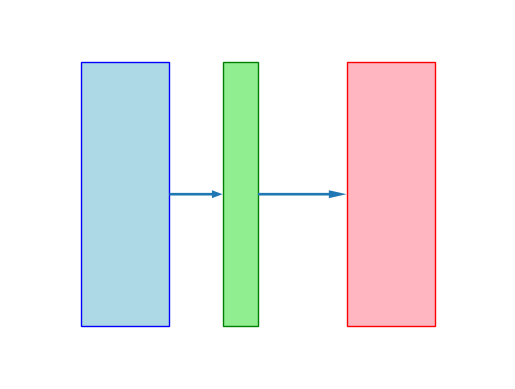

In [2]:
rectangle1 = plt.Rectangle((0,0), 0.5, 1, fc='lightblue',ec="blue")
rectangle2 = plt.Rectangle((0.8,0), 0.2, 1, fc='lightgreen',ec="green")
rectangle3 = plt.Rectangle((1.5,0), 0.5, 1, fc='lightpink',ec="red")
fleche1 = plt.Arrow(0.5, 0.5, 0.3, 0, width=0.05)
fleche2 = plt.Arrow(1.0, 0.5, 0.5, 0, width=0.05)
plt.gca().add_patch(rectangle1)
plt.gca().add_patch(rectangle2)
plt.gca().add_patch(rectangle3)
plt.gca().add_patch(fleche1)
plt.gca().add_patch(fleche2)
plt.axis('off')
plt.margins(0.2)
plt.show()

In [132]:
#exons_list = [[3000, 4500], [6700, 12000], [15000, 17000], [25000, 35000], [36000, 38000]]
exons_list = [[300000000, 450000000], [670000000, 1200000000], [1500000000, 1700000000], [2500000000, 3500000000], [3600000000, 3800000000]]
def draw_exons(exons, direction, color, offset=0, no_render=False):
    plt.axes()
    plt.xlim((-0.1, 1))
    plt.ylim((-0.3, 0.3))
    plt.margins(0.2)
    plt.axis('off')
    height = 0.2
    plt.plot([0.1, 0.1], linestyle='solid', linewidth=0.5, c='grey')
    j = 0
    k = 1
    if direction == 1:
        pos_start = exons[0][1]
        pos_end = exons[-1][0]
    else: #direction == -1
        pos_start = exons[-1][0]
        pos_end = exons[0][1]
        j = 1
        k = 0
    total_length = (pos_end - pos_start)
    total_length_with_margin = 1.05 * total_length
    pos_start_with_margin = pos_start - 0.025*total_length
    for i, exon in enumerate(exons):
        rectangle = plt.Rectangle(((exon[j] - pos_start_with_margin)/total_length_with_margin,offset), (exon[k] - exon[j])/total_length_with_margin, height, fc=color,ec="black")
        plt.gca().add_patch(rectangle)
    if i > 0:
        arrow = None
        if direction < 0:
            arrow = plt.arrow(1, offset - height/4, -1, 0, width=0.0015, head_length=0.01, head_width=0.1, length_includes_head=True, overhang=1)
        else:
            arrow = plt.arrow(0, offset - height/4, 1, 0, width=0.0015, head_length=0.01, head_width=0.1, length_includes_head=True, overhang=1)
        plt.gca().add_patch(arrow)
    fig = plt.gcf()
    plt.plot(np.array([0.025, 0.025]), np.array([offset - height/4 - 0.03, offset - height/4 + 0.03]), color='black')
    plt.plot(np.array([1 - 0.025, 1 - 0.025]), np.array([offset - height/4 - 0.03, offset - height/4 + 0.03]), color='black')
    plt.text(0.025, offset - height/4 - 0.075, pos_start, horizontalalignment='center', verticalalignment='center', fontsize=9)
    plt.text(1 - 0.025, offset - height/4 - 0.075, pos_end, horizontalalignment='center', verticalalignment='center', fontsize=9)
    fig.set_size_inches(20, 2)
    if not no_render:
        plt.show()
def draw_exons_list(exons, directions, colors):
    i = 0
    for (ex, di, co) in zip(exons, directions, colors):
        draw_exons(ex, di, co, offset=-0.5 * i, no_render=True)
    plt.show()

In [8]:
import requests, sys

server = "https://rest.ensembl.org"
ext = "/lookup/id/ENSMUST00000030636?expand=1"
 
r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()
print(repr(decoded))

{'Parent': 'ENSMUSG00000028832', 'assembly_name': 'GRCm39', 'is_canonical': 1, 'display_name': 'Stmn1-201', 'species': 'mus_musculus', 'Exon': [{'strand': 1, 'seq_region_name': '4', 'end': 134195740, 'start': 134195631, 'id': 'ENSMUSE00000743951', 'assembly_name': 'GRCm39', 'object_type': 'Exon', 'version': 2, 'db_type': 'core', 'species': 'mus_musculus'}, {'assembly_name': 'GRCm39', 'db_type': 'core', 'version': 3, 'object_type': 'Exon', 'species': 'mus_musculus', 'seq_region_name': '4', 'strand': 1, 'end': 134197486, 'start': 134197414, 'id': 'ENSMUSE00000385882'}, {'id': 'ENSMUSE00000182530', 'start': 134197978, 'end': 134198150, 'seq_region_name': '4', 'strand': 1, 'species': 'mus_musculus', 'db_type': 'core', 'version': 2, 'object_type': 'Exon', 'assembly_name': 'GRCm39'}, {'strand': 1, 'seq_region_name': '4', 'end': 134200306, 'start': 134200115, 'id': 'ENSMUSE00000524596', 'assembly_name': 'GRCm39', 'object_type': 'Exon', 'version': 2, 'db_type': 'core', 'species': 'mus_musculus

In [9]:
# dictionary items to a dataframe:
exon_list = list(decoded['Exon'])


In [10]:
exon_list

[{'strand': 1,
  'seq_region_name': '4',
  'end': 134195740,
  'start': 134195631,
  'id': 'ENSMUSE00000743951',
  'assembly_name': 'GRCm39',
  'object_type': 'Exon',
  'version': 2,
  'db_type': 'core',
  'species': 'mus_musculus'},
 {'assembly_name': 'GRCm39',
  'db_type': 'core',
  'version': 3,
  'object_type': 'Exon',
  'species': 'mus_musculus',
  'seq_region_name': '4',
  'strand': 1,
  'end': 134197486,
  'start': 134197414,
  'id': 'ENSMUSE00000385882'},
 {'id': 'ENSMUSE00000182530',
  'start': 134197978,
  'end': 134198150,
  'seq_region_name': '4',
  'strand': 1,
  'species': 'mus_musculus',
  'db_type': 'core',
  'version': 2,
  'object_type': 'Exon',
  'assembly_name': 'GRCm39'},
 {'strand': 1,
  'seq_region_name': '4',
  'end': 134200306,
  'start': 134200115,
  'id': 'ENSMUSE00000524596',
  'assembly_name': 'GRCm39',
  'object_type': 'Exon',
  'version': 2,
  'db_type': 'core',
  'species': 'mus_musculus'},
 {'strand': 1,
  'seq_region_name': '4',
  'id': 'ENSMUSE0000026

In [11]:
exon_coord = []
for i, e in enumerate(exon_list):
    coord = [e.get('end'), e.get('start')]
    exon_coord.append(coord)
print(exon_coord)

[[134195740, 134195631], [134197486, 134197414], [134198150, 134197978], [134200306, 134200115], [134201154, 134200643]]


plot a transcript from https://www.ensembl.org/Homo_sapiens/Transcript/Summary?db=core;g=ENSG00000157764;r=7:140719327-140924929;t=ENST00000644650

Define a function that takes as input an id of transcipt and returs exon coordinates retrieved from ensemble rest API:

In [ ]:
def get_coord_from_tscrpt_id(transcipt_id):
# get exon coordinates from ensemble API by transcript id:
    server = "https://rest.ensembl.org"
    ext = "/lookup/id/" + transcipt_id + "?expand=1"
 
    r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
    if not r.ok:
        r.raise_for_status()
        sys.exit()
 
    decoded = r.json()
# dictionary items to a dataframe:
    exon_list = list(decoded['Exon'])
    exon_coord = []
    for i, e in enumerate(exon_list):
        coord = [e.get('end'), e.get('start')]
        exon_coord.append(coord)
    return(exon_coord)

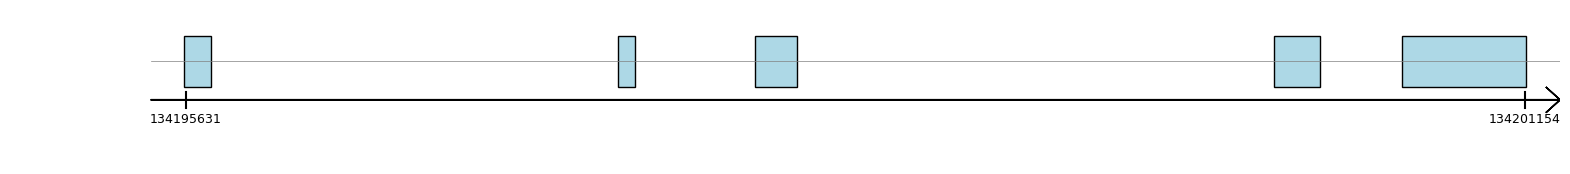

In [98]:

draw_exons(get_coord_from_tscrpt_id("ENSMUST00000030636"), 1, color="lightblue")


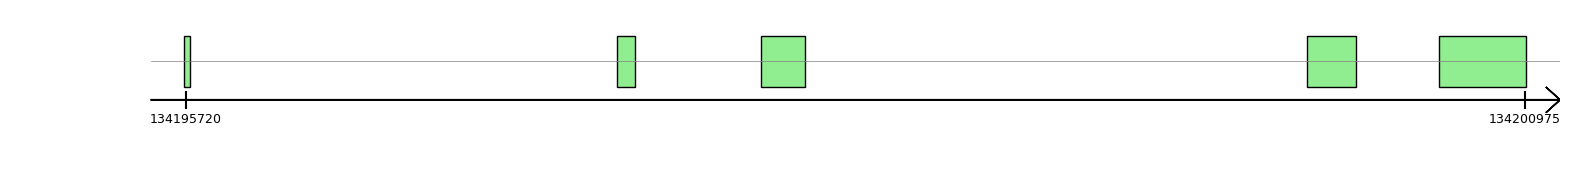

In [99]:
draw_exons(get_coord_from_tscrpt_id("ENSMUST00000105867"), 1, color="lightgreen")
# ENSMUST00000105867

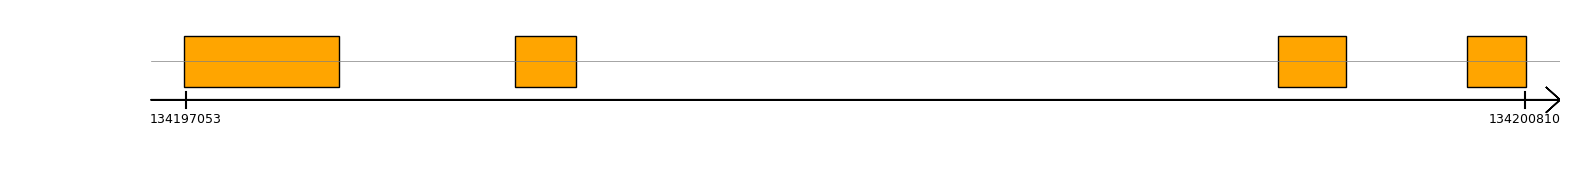

In [106]:
# ENSMUST00000105868
draw_exons(get_coord_from_tscrpt_id("ENSMUST00000105868"), 1, color="orange")

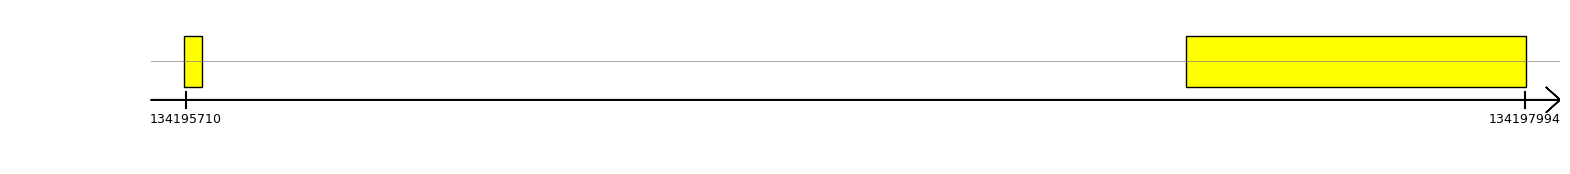

In [101]:
# ENSMUST00000130253
draw_exons(get_coord_from_tscrpt_id("ENSMUST00000130253"), 1, color="yellow")

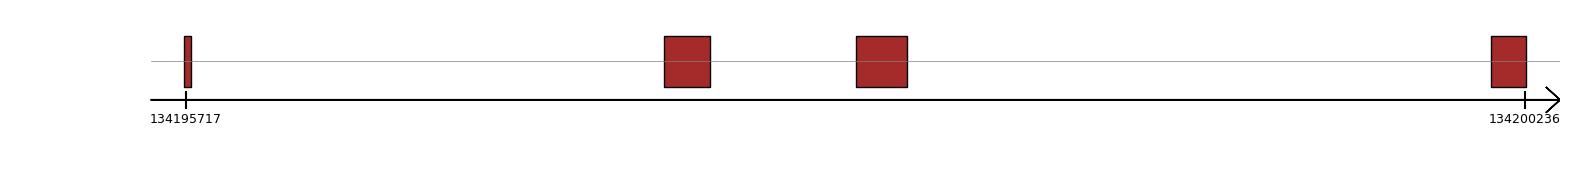

In [102]:
#ENSMUST00000127279
draw_exons(get_coord_from_tscrpt_id("ENSMUST00000127279"), 1, color="brown")

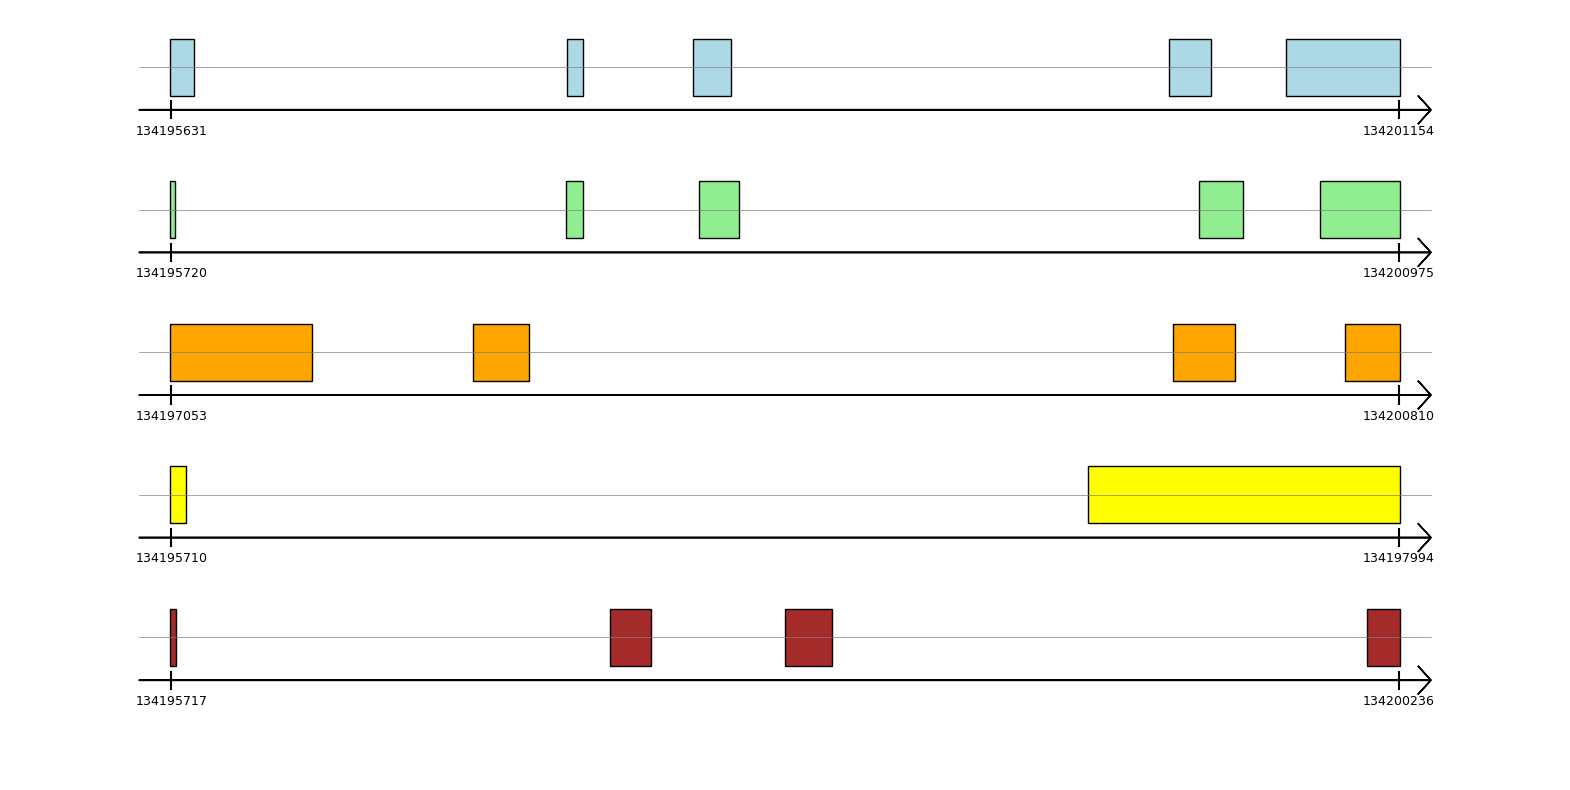

In [144]:
exons_list = [
    get_coord_from_tscrpt_id("ENSMUST00000030636"),
    get_coord_from_tscrpt_id("ENSMUST00000105867"),
    get_coord_from_tscrpt_id("ENSMUST00000105868"),
    get_coord_from_tscrpt_id("ENSMUST00000130253"),
    get_coord_from_tscrpt_id("ENSMUST00000127279")
]
directions = [1,1,1,1,1]
colors=['lightblue', 'lightgreen', 'orange', 'yellow', 'brown']

def draw_exons(exons, direction, color, offset=0, no_render=False):
    if not no_render:
        plt.axes()
        plt.xlim((-0.1, 1))
        plt.ylim((-0.3, 0.3))
        plt.margins(0.2)
        plt.axis('off')
        fig = plt.gcf()
        fig.set_size_inches(20, 2)
    height = 0.2
    plt.plot([offset + 0.1, offset + 0.1], linestyle='solid', linewidth=0.5, c='grey')
    j = 0
    k = 1
    if direction == 1:
        pos_start = exons[0][1]
        pos_end = exons[-1][0]
    else: #direction == -1
        pos_start = exons[-1][0]
        pos_end = exons[0][1]
        j = 1
        k = 0
    total_length = pos_end - pos_start
    total_length_with_margin = 1.05 * total_length
    pos_start_with_margin = pos_start - 0.025*total_length
    for i, exon in enumerate(exons):
        rectangle = plt.Rectangle(((exon[j] - pos_start_with_margin)/total_length_with_margin,offset), (exon[k] - exon[j])/total_length_with_margin, height, fc=color,ec="black")
        plt.gca().add_patch(rectangle)
    if i > 0:
        arrow = None
        if direction < 0:
            arrow = plt.arrow(1, offset - height/4, -1, 0, width=0.0015, head_length=0.01, head_width=0.1, length_includes_head=True, overhang=1)
        else:
            arrow = plt.arrow(0, offset - height/4, 1, 0, width=0.0015, head_length=0.01, head_width=0.1, length_includes_head=True, overhang=1)
        plt.gca().add_patch(arrow)
    plt.plot(np.array([0.025, 0.025]), np.array([offset - height/4 - 0.03, offset - height/4 + 0.03]), color='black')
    plt.plot(np.array([1 - 0.025, 1 - 0.025]), np.array([offset - height/4 - 0.03, offset - height/4 + 0.03]), color='black')
    plt.text(0.025, offset - height/4 - 0.075, pos_start, horizontalalignment='center', verticalalignment='center', fontsize=9)
    plt.text(1 - 0.025, offset - height/4 - 0.075, pos_end, horizontalalignment='center', verticalalignment='center', fontsize=9)
    if not no_render:
        plt.show()
def draw_exons_list(exons, directions, colors):
    plt.axes()
    plt.xlim((-0.1, 1.1))
    plt.ylim((0.1 - 0.5 *  len(exons_list), 0.3))
    plt.margins(0.2)
    plt.axis('off')
    fig = plt.gcf()
    fig.set_size_inches(20, len(exons) * 2)
    i = 0
    for (ex, di, co) in zip(exons, directions, colors):
        draw_exons(ex, di, co, offset= -0.5 * i, no_render=True)
        i+=1
    plt.show()

draw_exons_list(exons_list, directions, colors)

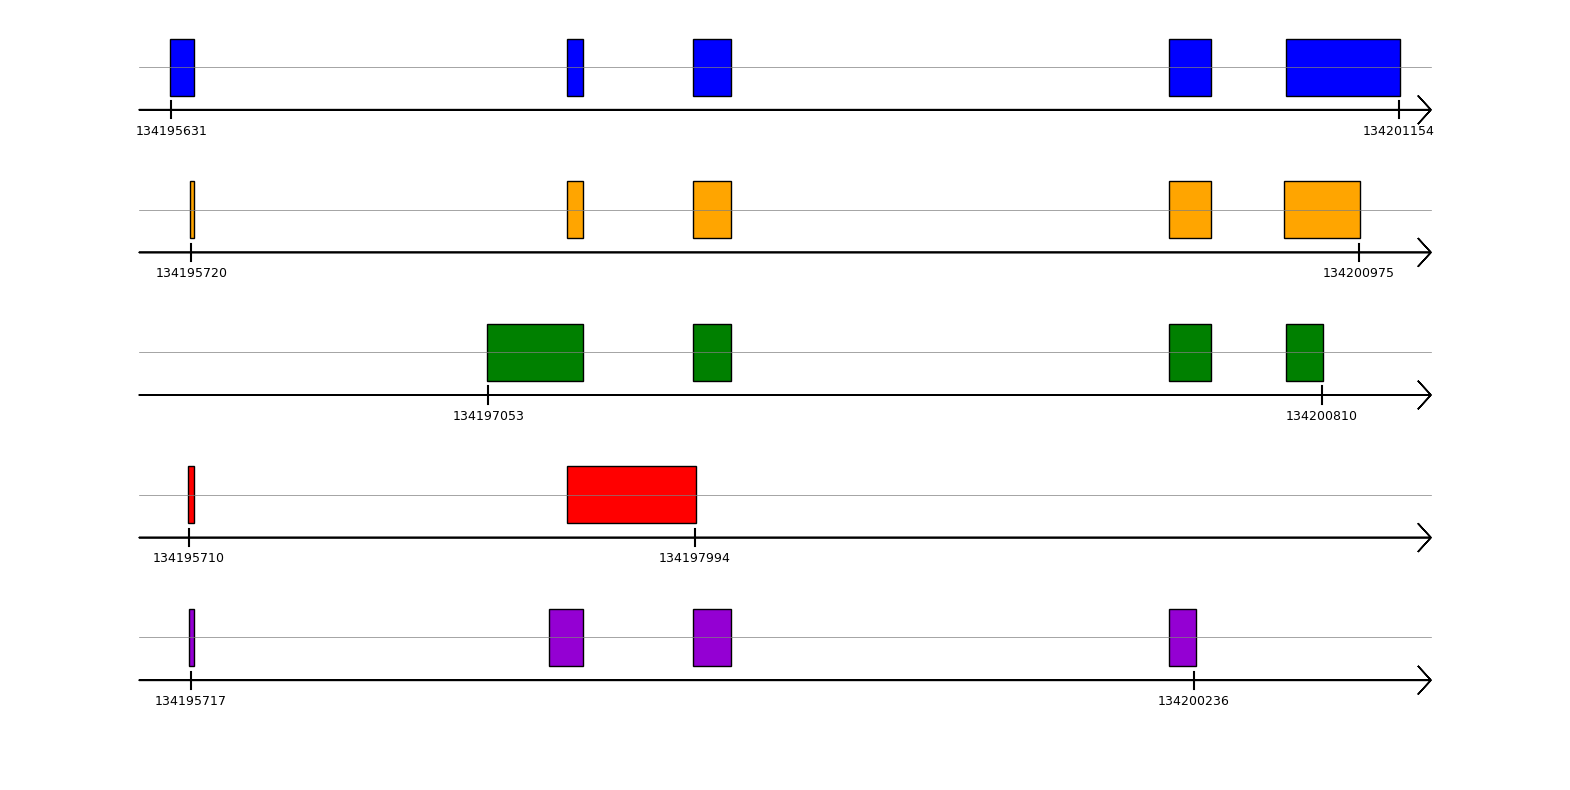

In [174]:
exons_list = [
    get_coord_from_tscrpt_id("ENSMUST00000030636"),
    get_coord_from_tscrpt_id("ENSMUST00000105867"),
    get_coord_from_tscrpt_id("ENSMUST00000105868"),
    get_coord_from_tscrpt_id("ENSMUST00000130253"),
    get_coord_from_tscrpt_id("ENSMUST00000127279")
]
directions = [1,1,1,1,1]
colors=['blue', 'orange', 'green', 'red', 'darkviolet']

def draw_exons(exons, direction, color, offset=0, start_override=None, end_override=None, no_render=False):
    if not no_render:
        plt.axes()
        plt.xlim((-0.1, 1))
        plt.ylim((-0.3, 0.3))
        plt.margins(0.2)
        plt.axis('off')
        fig = plt.gcf()
        fig.set_size_inches(20, 2)
    height = 0.2
    plt.plot([offset + 0.1, offset + 0.1], linestyle='solid', linewidth=0.5, c='grey')
    j = 0
    k = 1
    if direction == 1:
        pos_start = exons[0][1]
        pos_end = exons[-1][0]
    else: #direction == -1
        pos_start = exons[-1][0]
        pos_end = exons[0][1]
        j = 1
        k = 0
    real_start = pos_start
    real_end = pos_end
    if start_override is not None and end_override is not None:
        pos_start = start_override
        pos_end = end_override
    total_length = pos_end - pos_start
    total_length_with_margin = 1.05 * total_length
    pos_start_with_margin = pos_start - 0.025*total_length
    for i, exon in enumerate(exons):
        rectangle = plt.Rectangle(((exon[j] - pos_start_with_margin)/total_length_with_margin,offset), (exon[k] - exon[j])/total_length_with_margin, height, fc=color,ec="black")
        plt.gca().add_patch(rectangle)
    if i > 0:
        arrow = None
        if direction < 0:
            arrow = plt.arrow(1, offset - height/4, -1, 0, width=0.0015, head_length=0.01, head_width=0.1, length_includes_head=True, overhang=1)
        else:
            arrow = plt.arrow(0, offset - height/4, 1, 0, width=0.0015, head_length=0.01, head_width=0.1, length_includes_head=True, overhang=1)
        plt.gca().add_patch(arrow)
    plt.plot(np.array([0.025 + (real_start - pos_start) / (total_length)/1.05, 0.025 + (real_start - pos_start) / (total_length)/1.05]), np.array([offset - height/4 - 0.03, offset - height/4 + 0.03]), color='black')
    plt.plot(np.array([1 - 0.025 - (pos_end - real_end) / (total_length)/1.05, 1 - 0.025 - (pos_end - real_end) / (total_length)/1.05]), np.array([offset - height/4 - 0.03, offset - height/4 + 0.03]), color='black')
    plt.text(0.025 + (real_start - pos_start) / (total_length)/1.05, offset - height/4 - 0.075, real_start, horizontalalignment='center', verticalalignment='center', fontsize=9)
    plt.text(1 - 0.025 - (pos_end - real_end) / (total_length)/1.05, offset - height/4 - 0.075, real_end, horizontalalignment='center', verticalalignment='center', fontsize=9)
    if not no_render:
        plt.show()
def draw_exons_list(exons, directions, colors):
    def get_limits(ex, dir):
        start = sys.maxsize
        end = -sys.maxsize
        for (e, d) in zip(ex, dir):
            if d == 1:
                start = min(start,e[0][1])
                end = max(end, e[-1][0])
            else:
                start = min(start,e[-1][0])
                end = max(end, e[0][1])
        return (start, end)

    plt.axes()
    plt.xlim((-0.1, 1.1))
    plt.ylim((0.1 - 0.5 *  len(exons_list), 0.3))
    plt.margins(0.2)
    plt.axis('off')
    fig = plt.gcf()
    fig.set_size_inches(20, len(exons) * 2)
    i = 0
    (start, end) = get_limits(exons, directions)
    for (ex, di, co) in zip(exons, directions, colors):
        draw_exons(ex, di, co, offset= -0.5 * i, start_override=start, end_override=end, no_render=True)
        i+=1
    plt.show()

draw_exons_list(exons_list, directions, colors)
# draw_exons(exons_list[0], directions[0], colors[0])
# draw_exons(exons_list[1], directions[1], colors[1])
# draw_exons(exons_list[2], directions[2], colors[2])